# Collaborative Filtering
### SVD Matrix Factorization

In [4]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
import pandas as pd
# Load your dataset here
# For simplicity, we're using the Surprise library's built-in dataset.
ratings = pd.read_csv('../data/lens_tmdb/ratings_small.csv')

reader = Reader(rating_scale=(1, 5))  # Rating scale for MovieLens is from 1 to 5
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split into train and test set
trainset, testset = train_test_split(data, test_size=0.25)

# Train SVD recommender
svd = SVD()
svd.fit(trainset)

# Predictions
predictions = svd.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)


RMSE: 0.8956


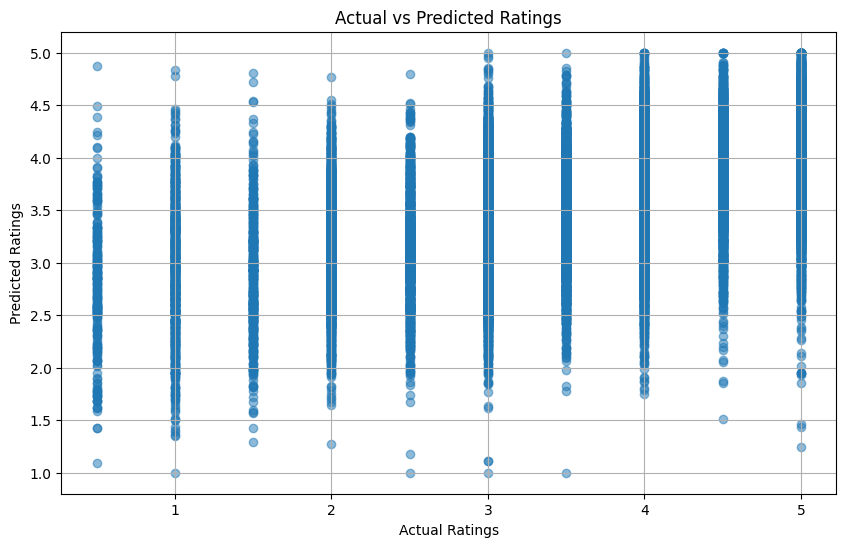

In [5]:
import matplotlib.pyplot as plt

# Extract actual and predicted ratings
actual = [pred.r_ui for pred in predictions]
predicted = [pred.est for pred in predictions]

# Scatter plot of actual vs predicted ratings
plt.figure(figsize=(10,6))
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)

# Annotate the RMSE on the plot
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.1, 4.5), fontsize=12)

# Show the plot
plt.show()
